<a href="https://colab.research.google.com/github/ayakow1/ttic31220-japanparliament-analysis/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [ ]:
!pip install mecab-python3 unidic-lite
!pip install japanize-matplotlib

import pandas as pd
import MeCab
import gensim
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import sqlite3
import pandas as pd


In [ ]:
# Import Data

from google.colab import drive
drive.mount("/content/drive")

# conn = sqlite3.connect('/content/drive/MyDrive/議事録/raw_speech.db')
# all = pd.read_sql_query(f'''SELECT * FROM raw_speech WHERE speech_date >= '2022-01-01' AND speech_date <= '2023-04-31' ''', conn)
conn = sqlite3.connect('/content/drive/MyDrive/議事録/speech.db')
all = pd.read_sql_query(f'''SELECT * FROM speech WHERE speech_date >= '2022-01-01' AND speech_date <= '2023-04-31' ''', conn)
docs = all['speech'].to_list()
conn.close()


Mounted at /content/drive


# LDA implementation

In [ ]:
# docs_lda = []
# for d in docs:
#     docs_lda.append(d.split(" "))
docs_lda = [d.split(" ") for d in docs]
dictionary = gensim.corpora.Dictionary(docs_lda)
corpus = [dictionary.doc2bow(doc) for doc in docs_lda]


In [ ]:
n_cluster = 60
lda = gensim.models.LdaModel(
                corpus=corpus,
                id2word=dictionary,
                num_topics=n_cluster, 
                minimum_probability=0.001,
                passes=20, 
                update_every=0, 
                chunksize=10000,
                random_state=1
                )

# Visualization

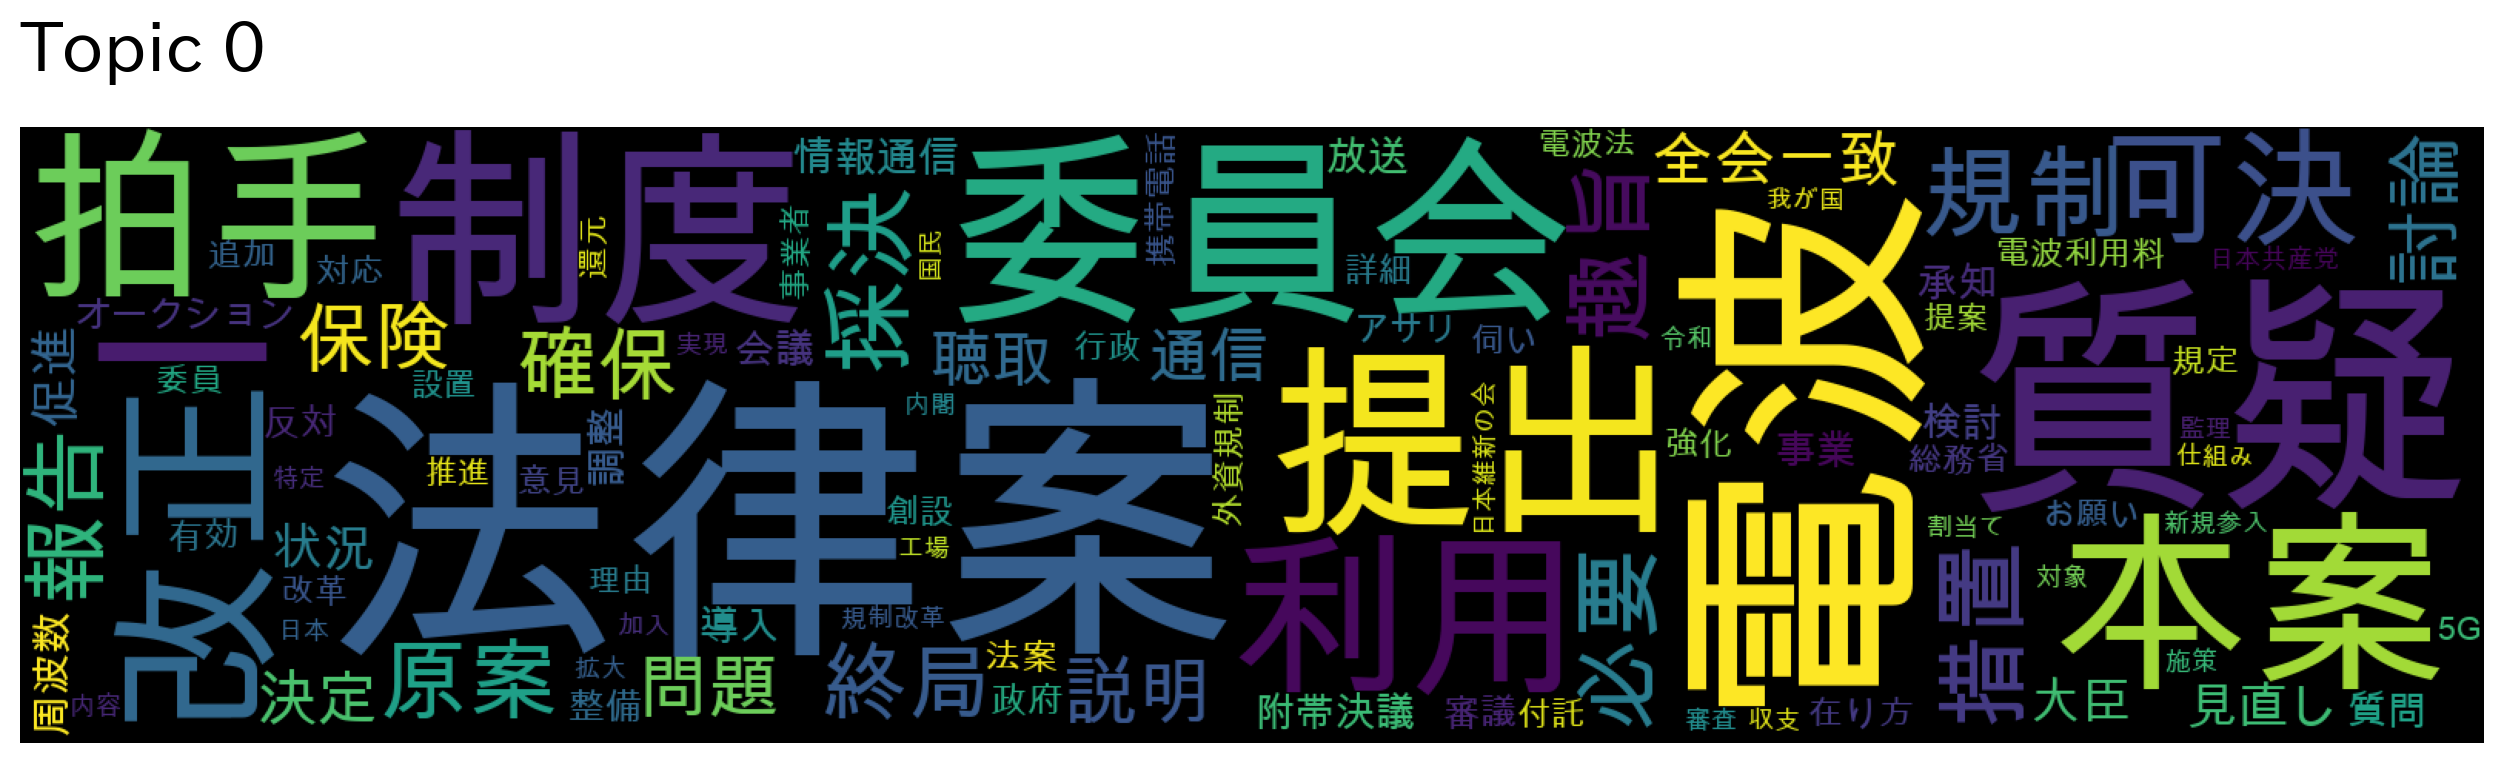

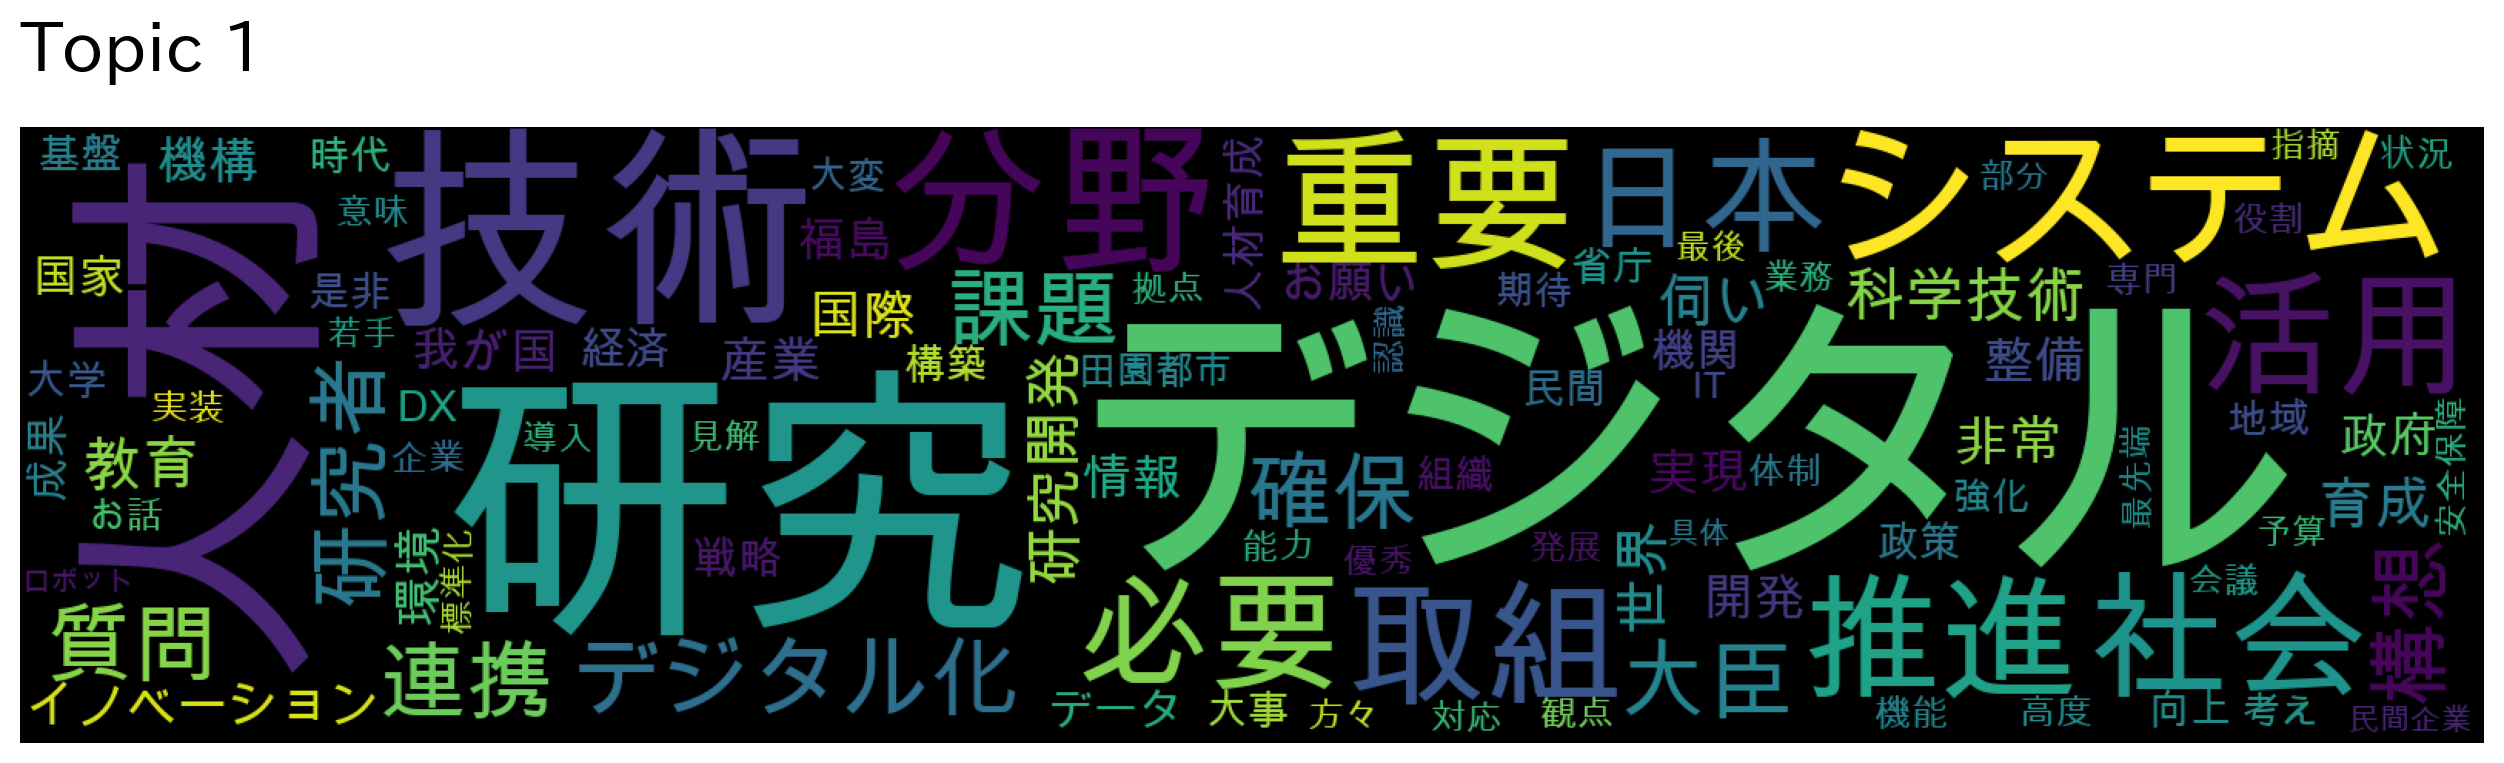

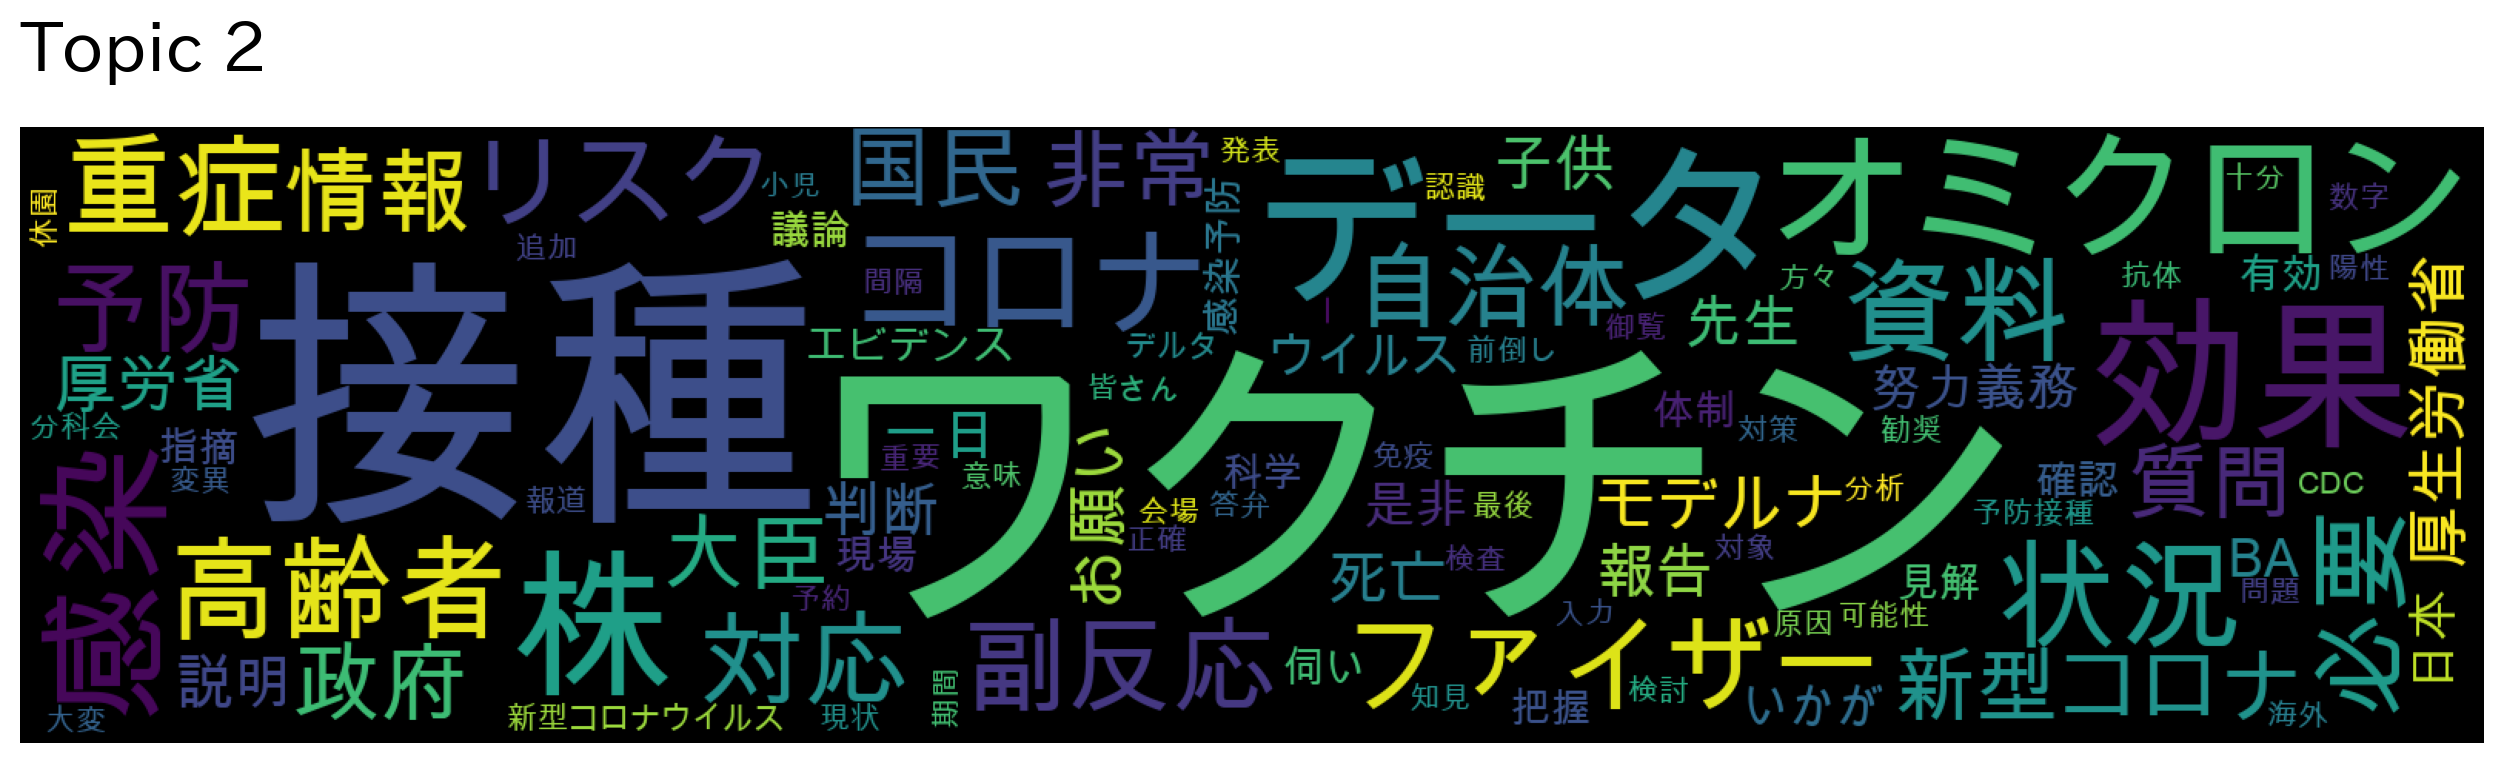

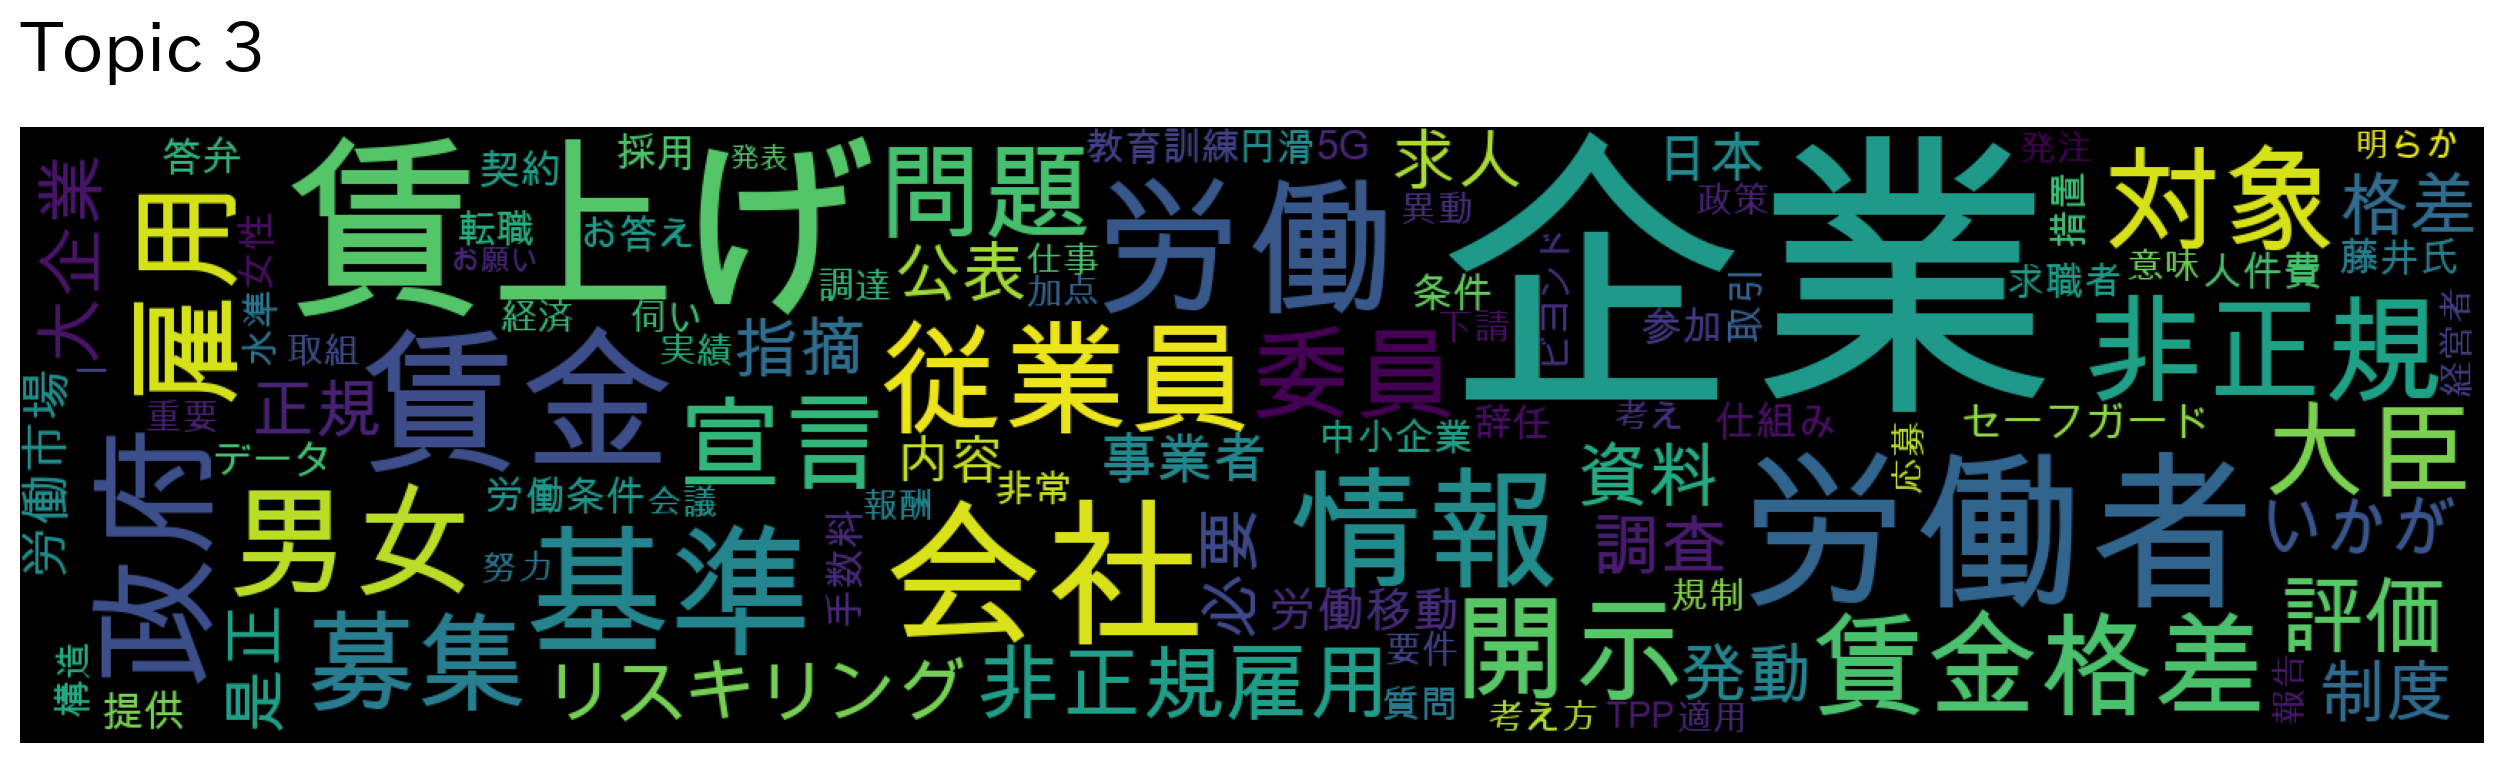

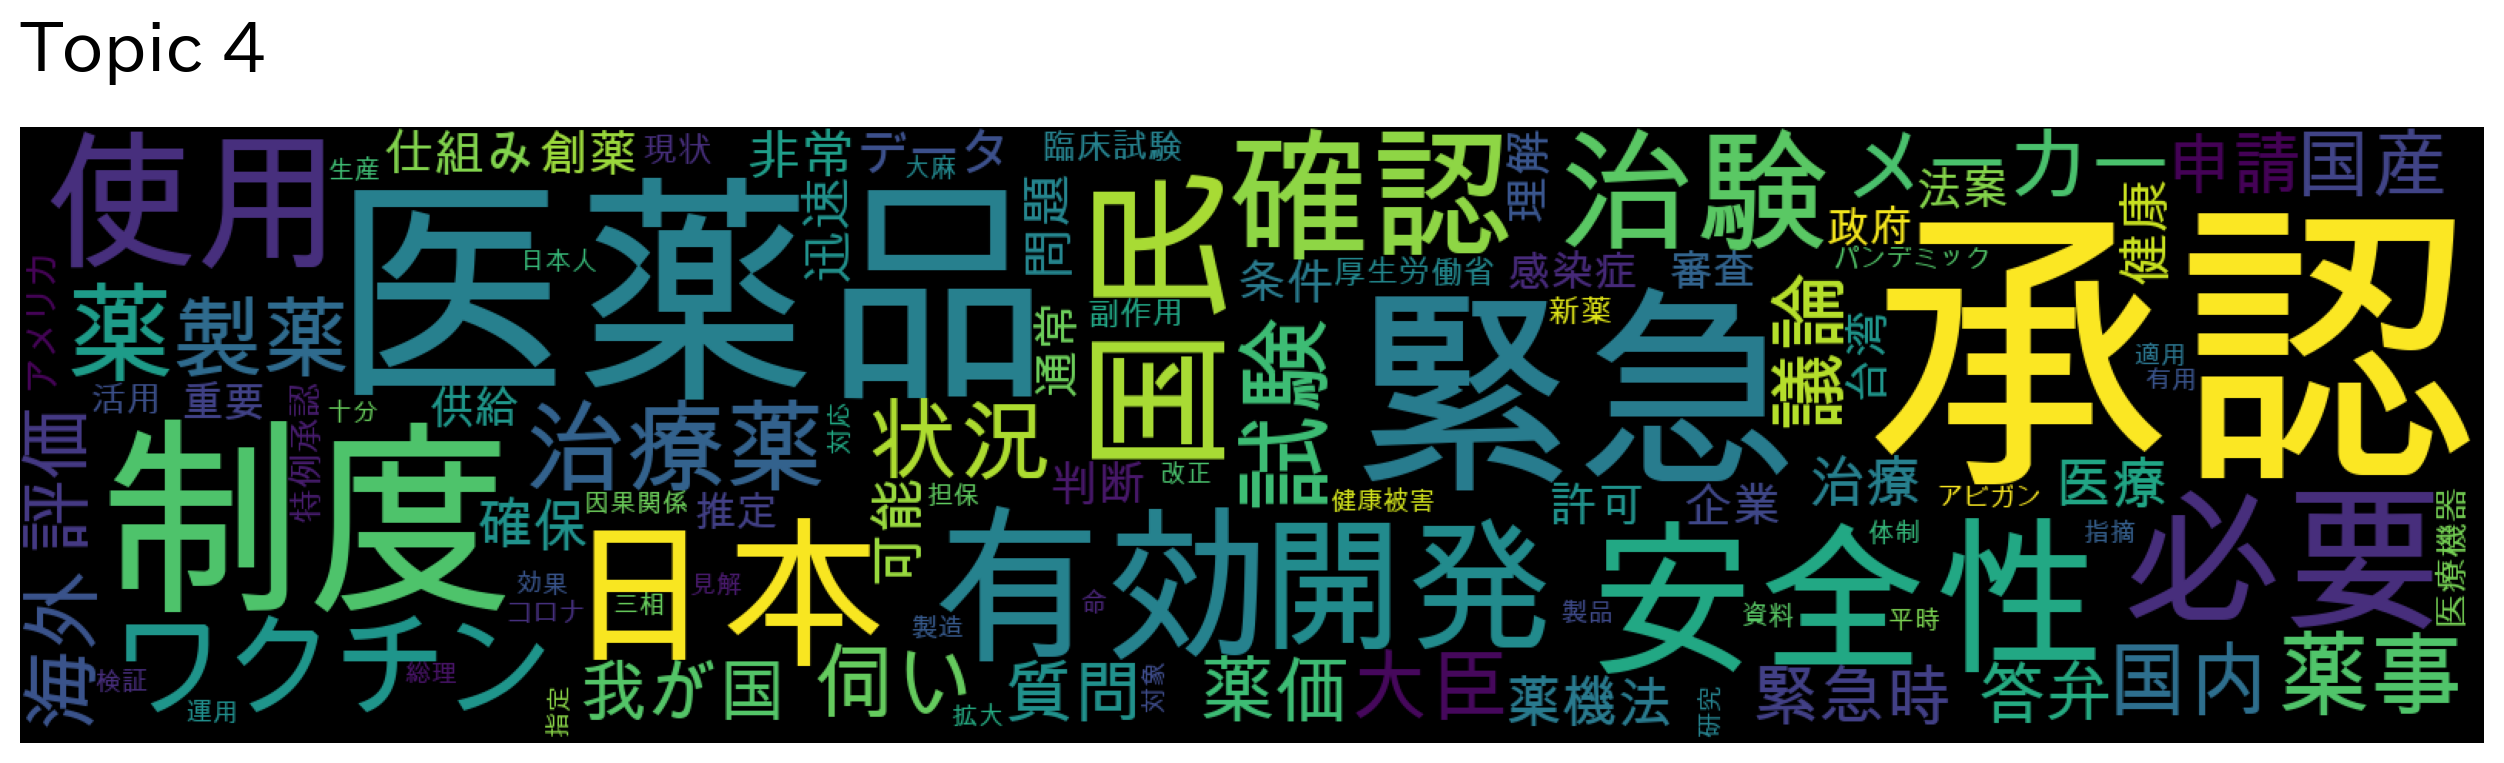

In [ ]:
from wordcloud import WordCloud
num_clouds = 5
FONT_PATH = '/Library/Fonts/ipaexg.ttf'

for t in range(num_clouds):
    plt.figure(figsize=(16, 4),
                   dpi=200)
    plt.axis("off")
    word_score_dict = dict(lda.show_topic(t, 100))
    plt.imshow(WordCloud(width=1600, height=400, mode='RGBA', background_color='black', \
     font_path='/content/drive/MyDrive/議事録/Arial Unicode.ttf', max_words=1000, max_font_size=200).generate_from_frequencies(word_score_dict))
    plt.title("Topic " + str(t), loc='left', fontsize=25, pad=20)
    plt.show()

In [ ]:
lists = []
for i in range(n_cluster):
    temp_df = pd.DataFrame(lda.show_topic(i),columns=["word","score"])
    temp_df["topic"] = i
    lists.append(temp_df)
topic_word_df = pd.concat(lists,ignore_index=True)
topic_word_df["rank"] = topic_word_df.groupby("topic")["score"].rank()
topic_word_df.pivot(index='topic', columns='rank', values='word')

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
topic,,,,,,,,,,
0,改正,拍手,本案,ー,提出,委員会,制度,質疑,電波,法律案
1,取組,推進,社会,重要,システム,分野,技術,人材,研究,デジタル
2,資料,コロナ,状況,感染,オミクロン,株,効果,データ,接種,ワクチン
3,男女,政府,情報,基準,労働,賃金,会社,労働者,賃上げ,企業
4,使用,国民,必要,日本,有効,安全性,制度,緊急,医薬品,承認
5,質問,養育,転換,博士,公募,雇い止め,開発,支援,委託,里親
6,職員,質問,規定,問題,必要,法務省,法律,制度,取得,改正
7,交換,調査,大臣,取引,大会,日本,質問,スポーツ,暗号,資産
8,廃止,地元,福島,皆さん,廃炉,事故,住民,原発,保険証,マイナンバーカード


In [ ]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97721 sha256=f3ebd4426f8e37cb1886536f7e5ea7910ea378433bf70b44fbae38f7feff0145
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(vis, '/content/drive/MyDrive/議事録/LDA/lda_pyldavis.html')


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)
